In [0]:
import pandas as pd 
import numpy as np

In [1057]:
df = pd.read_csv("cars.csv", sep = ",",encoding='cp1251')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,7,9,12,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000.0,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0.0,70435,2016-04-07 03:16:57;;;;;;;;
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000.0,5,diesel,audi,ja,2016-03-24 00:00:00,0.0,66954,2016-04-07 01:46:50;;;;;;;;
2,"2016-03-14 12:52:21,Jeep_Grand_Cherokee_""Overl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000.0,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0.0,91074,2016-03-17 17:40:17;;;;;;;;
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000.0,7,diesel,skoda,nein,2016-03-31 00:00:00,0.0,60437,2016-04-06 10:17:21;;;;;;;;


In [0]:
def pars_change (df):
    list_tmp = ''
    #k = 0 
    for i in range(0,len(df)):
        if len(df.iloc[i,0]) > 19:
            #list_tmp = list_tmp +"; " + str(i)
            instr = df.iloc[i,0]
            list_str = instr.split(sep=",")
            t = 0
            for j in list_str: 
                df.iloc[i,t] = j
                t = t+1
            
            #k = k + 1
        else:
            pass 
    #return list_tmp

In [0]:
pars_change(df) # распарсили не распарсишвиеся при загрузке строки 

In [0]:
# Удалим дубликаты 
df.drop_duplicates(keep=False, inplace = True)


In [0]:
 # Удалили дубликаты - обновим индексы
 df = df.reset_index(drop=True)

In [1062]:
# Очистим последний столбец от ";"
df['lastSeen;;;;;;;;']=df['lastSeen;;;;;;;;'].str.replace(';','')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen;;;;;;;;
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [1063]:
# Изменим название последнего стобца
df.rename(columns = {'lastSeen;;;;;;;;': 'lastSeen'}, inplace =True)
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [1064]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371818 entries, 0 to 371817
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371818 non-null  object
 1   name                 371818 non-null  object
 2   seller               371818 non-null  object
 3   offerType            371818 non-null  object
 4   price                371818 non-null  object
 5   abtest               371817 non-null  object
 6   vehicleType          334080 non-null  object
 7   yearOfRegistration   371816 non-null  object
 8   gearbox              351658 non-null  object
 9   powerPS              371818 non-null  object
 10  model                351395 non-null  object
 11  kilometer            371818 non-null  object
 12  monthOfRegistration  371817 non-null  object
 13  fuelType             338545 non-null  object
 14  brand                371816 non-null  object
 15  notRepairedDamage    300079 non-nu

In [1065]:
len(df)

371818

In [0]:
df_copy = df.copy() # чтобы каждый раз не вызывать 

Привел датасэт к нормальному виду: 1) убрал ";" в последнем стобце 2) распарсил строки, которые не расрасились при загрузке 

### Предварительный анализ данных

In [1067]:
# Информация по фичам (название, кол-во пропущенных значений, число унивкальных значений, питонячий тип)
pd.DataFrame({'Feature': df.columns.tolist(),
              'NaN_count': df.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(df.columns.tolist()).apply(lambda row: df[row].nunique()),
              'type': pd.Series(df.columns.tolist()).apply(lambda row: df[row].dtype)})

,Feature,NaN_count,number_of_unique_elements,type
0,dateCrawled,0,280649,object
1,name,0,233703,object
2,seller,0,3,object
3,offerType,0,8,object
4,price,0,8410,object
5,abtest,1,5,object
6,vehicleType,37738,13,object
7,yearOfRegistration,2,263,object
8,gearbox,20160,8,object
9,powerPS,0,1281,object


In [1068]:
df['vehicleType'].unique()


array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere', '', '1992', '1996', '2005', '1998'],
      dtype=object)

In [1069]:
df['yearOfRegistration'].unique()

array([1993.0, 2011.0, '2004', 2001.0, 2008.0, 1995.0, 2004.0, 1980.0,
       2014.0, 1998.0, 2005.0, '1995', 1910.0, 2016.0, 2007.0, 2009.0,
       2002.0, 2018.0, 1997.0, 1990.0, 2017.0, 1981.0, 2003.0, 1994.0,
       1991.0, 1984.0, 2006.0, 1999.0, 2012.0, 2010.0, 2000.0, 1992.0,
       2013.0, 1996.0, 1985.0, 1989.0, 2015.0, 1968.0, '2009', '2007',
       1982.0, '1999', 1976.0, 1983.0, 1959.0, 1973.0, '2016', '2002',
       1111.0, 1969.0, 1971.0, '1989', '1997', 1987.0, 1986.0, '2000',
       1988.0, '2011', 1967.0, '2012', 1970.0, '2003', '1985', 1965.0,
       1945.0, 1925.0, 1974.0, 1979.0, '2001', 1955.0, '1996', '2015',
       '2008', 1978.0, '2013', 1972.0, '2018', '2010', 1977.0, 1961.0,
       '2006', 1963.0, '1984', 1964.0, 1960.0, 1966.0, '1994', '1990',
       '1998', 1975.0, '2014', 1937.0, '1993', '1961', '1991', 1936.0,
       5000.0, 1954.0, 1958.0, '2005', '1980', '1988', 9999.0, 1956.0,
       3200.0, 1000.0, 1933.0, 1941.0, 1962.0, 8888.0, 1500.0, 2200.0,
      

In [1070]:
df['gearbox'].unique()

array(['manuell', 'automatik', nan, '', '0', '122', '75', '215', '133'],
      dtype=object)

In [1071]:
df['model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt',
       'impreza', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'i_reihe',
       'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento', 'ceed',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', '

In [1072]:
df['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', '', 'cng',
       'elektro', 'volkswagen', 'mercedes_benz', 'peugeot', 'ford'],
      dtype=object)

In [1073]:
df[df['vehicleType'] == '1998' ] 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
237969,2016-03-15 21:52:10,"VW_Passat_3B_1.8Turbo_K04_3""__kein_GTI;R32;VR6...",Angebot,2500,control,limousine,1998,manuell,215,passat,150000,0,benzin,volkswagen,NaN,2016-03-15 00:00:00,0,49838,2016-03-25 23:17:58;;;;,NaN
264060,2016-03-21 13:58:37,"Golf_IV_1.4__17""MAM_Felgen__Gewindefahrwerk___...",Angebot,1750,test,limousine,1998,manuell,75,golf,150000,5,benzin,volkswagen,nein,2016-03-21 00:00:00,0,53347,2016-04-06 10:15:23;;;;;;;,NaN


Есть строки, в которых данные сместились по столбцам

In [1074]:
df.iloc[237973,-2]

'30655'

In [1075]:
s = df.iloc[237973,-2]
s.find("_")

-1

In [1076]:
type(df.iloc[237973,-2])

str

In [1077]:
type(df.iloc[0,-2])

float

In [0]:
# сколько смещенных по столбцам строк 
def find_wrong_rows_cnt(df):
    rows = []
    k = 0 
    for i in range(0,len(df)):
        tmp =df.iloc[i,-2] #  "PostalCode"
        if type(tmp) == str and  tmp.find(";") != -1: # есть ";"
            #df.iloc[i,-1] = s[:19]
            rows.append(i)
            k = k+1 
        else:
            pass
        #k = k+1 
    return rows

In [1079]:
list_str = find_wrong_rows_cnt(df)
list_str

[147979, 210854, 219909, 237969, 264060, 303686]

Их всего 6, поэтому можем их удалить 

In [1080]:
#  Строки для исправления - сместить?
df.iloc[list_str,:]

# Неправильных строк всего 6 - можно удалить 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
147979,2016-03-30 15:47:55,"Polo_86_c__""Nicht_im_Abgassskandal_verwickelt_...",Angebot,249,test,coupe,1992,NaN,0,polo,150000,10,benzin,volkswagen,ja,2016-03-30 00:00:00,0,45739,2016-03-30 15:47:55;;;;;;;,NaN
210854,2016-03-30 22:56:39,"C180_T_im_""Rat_Look"".._laeuft_gut;__Tuev_noch_...",Angebot,990,control,kombi,1996,manuell,122,c_klasse,150000,10,benzin,mercedes_benz,nein,2016-03-30 00:00:00,0,40470,2016-04-05 22:17:54;;;;;;;,NaN
219909,2016-03-12 13:52:03,"Peugeot__1o6___Sport____""_____Klima_____Teile_...",Angebot,17,control,NaN,2005,NaN,75,1_reihe,150000,8,NaN,peugeot,NaN,2016-03-12 00:00:00,0,59457,2016-04-06 21:18:45;;;;;;;,NaN
237969,2016-03-15 21:52:10,"VW_Passat_3B_1.8Turbo_K04_3""__kein_GTI;R32;VR6...",Angebot,2500,control,limousine,1998,manuell,215,passat,150000,0,benzin,volkswagen,NaN,2016-03-15 00:00:00,0,49838,2016-03-25 23:17:58;;;;,NaN
264060,2016-03-21 13:58:37,"Golf_IV_1.4__17""MAM_Felgen__Gewindefahrwerk___...",Angebot,1750,test,limousine,1998,manuell,75,golf,150000,5,benzin,volkswagen,nein,2016-03-21 00:00:00,0,53347,2016-04-06 10:15:23;;;;;;;,NaN
303686,2016-03-31 14:57:12,"Ford_Mondeo_nach_Ьberschlag_mit_""leichtem_Blec...",Angebot,450,control,limousine,2005,automatik,133,mondeo,150000,2,diesel,ford,ja,2016-03-31 00:00:00,0,34454,2016-04-06 07:45:25;;;;;;;,NaN


In [1081]:
# Для сравнения - правильно заполеннные строки: 
df.iloc[[0,1],:]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


In [0]:
df = df[~df.index.isin(list_str)]

In [0]:
df_copy = df.copy()

In [1084]:
# Проверим удаление
find_wrong_rows_cnt(df)

[]

In [1085]:
df[df['seller']== 'Angebot']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


In [1086]:
df['vehicleType'].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere', ''], dtype=object)

In [1087]:
df['yearOfRegistration'].unique()

array([1993.0, 2011.0, '2004', 2001.0, 2008.0, 1995.0, 2004.0, 1980.0,
       2014.0, 1998.0, 2005.0, '1995', 1910.0, 2016.0, 2007.0, 2009.0,
       2002.0, 2018.0, 1997.0, 1990.0, 2017.0, 1981.0, 2003.0, 1994.0,
       1991.0, 1984.0, 2006.0, 1999.0, 2012.0, 2010.0, 2000.0, 1992.0,
       2013.0, 1996.0, 1985.0, 1989.0, 2015.0, 1968.0, '2009', '2007',
       1982.0, '1999', 1976.0, 1983.0, 1959.0, 1973.0, '2016', '2002',
       1111.0, 1969.0, 1971.0, '1989', '1997', 1987.0, 1986.0, '2000',
       1988.0, '2011', 1967.0, '2012', 1970.0, '2003', '1985', 1965.0,
       1945.0, 1925.0, 1974.0, 1979.0, '2001', 1955.0, '1996', '2015',
       '2008', 1978.0, '2013', 1972.0, '2018', '2010', 1977.0, 1961.0,
       '2006', 1963.0, '1984', 1964.0, 1960.0, 1966.0, '1994', '1990',
       '1998', 1975.0, '2014', 1937.0, '1993', '1961', '1991', 1936.0,
       5000.0, 1954.0, 1958.0, '2005', '1980', '1988', 9999.0, 1956.0,
       3200.0, 1000.0, 1933.0, 1941.0, 1962.0, 8888.0, 1500.0, 2200.0,
      

In [1088]:
df['gearbox'].unique()

array(['manuell', 'automatik', nan, ''], dtype=object)

In [1089]:
df['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', '', 'cng',
       'elektro'], dtype=object)

In [1090]:
# Информация по фичам (название, кол-во пропущенных значений, число унивкальных значений, питонячий тип)
pd.DataFrame({'Feature': df.columns.tolist(),
              'NaN_count': df.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(df.columns.tolist()).apply(lambda row: df[row].nunique()),
              'type': pd.Series(df.columns.tolist()).apply(lambda row: df[row].dtype)})

,Feature,NaN_count,number_of_unique_elements,type
0,dateCrawled,0,280646,object
1,name,0,233697,object
2,seller,0,2,object
3,offerType,0,2,object
4,price,0,8408,object
5,abtest,0,2,object
6,vehicleType,37738,9,object
7,yearOfRegistration,0,261,object
8,gearbox,20160,3,object
9,powerPS,0,1275,object


In [1091]:
df[df['vehicleType']=='']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
566,2016-03-18 22:48:44,Sehr_Gepflegter_Golf_IV_PACIFIC_1._Hand_101_PS...,privat,Angebot,4550,test,,2016,manuell,101,golf,150000,8,diesel,volkswagen,nein,2016-03-18 00:00:00,0,52062,2016-03-25 03:47:16
1481,2016-04-04 06:36:46,"2_Autobianchi_A_112_""Projektaufgabe""",privat,Angebot,1900,test,,1985,,0,andere,90000,0,,lancia,,2016-04-04 00:00:00,0,71287,2016-04-06 10:16:55
3523,2016-03-14 05:47:56,"Vw_Scirocco_3_160Ps_18""Interlagos_PDC_uvm.",privat,Angebot,9000,test,,2016,manuell,160,scirocco,150000,0,,volkswagen,nein,2016-03-13 00:00:00,0,45899,2016-03-28 21:19:43
4916,2016-04-04 19:37:01,"Renault_Clio_1_2_TЬV_NEU!!!_•ULTRA_SPARSAM•""Gu...",privat,Angebot,1480,test,,2018,manuell,54,clio,150000,0,benzin,renault,,2016-04-04 00:00:00,0,33602,2016-04-06 21:45:19
6505,2016-03-17 17:53:43,"Zu_verkaufen_ist_mein_Flitzer_""Ford_Focus_""",privat,Angebot,750,control,,2016,manuell,0,focus,150000,0,,ford,,2016-03-17 00:00:00,0,25704,2016-04-07 05:16:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364878,2016-03-26 15:57:27,"Audi_A4_S_Line_Xenon_Leder_Navi_18""_Alu",privat,Angebot,16999,test,,2016,manuell,143,a4,80000,3,,audi,nein,2016-03-26 00:00:00,0,63584,2016-04-04 03:46:19
365009,2016-03-21 08:55:30,"Nissan_QASHQAI_""Tekna""_Vollausstattung_+_BOSE_...",privat,Angebot,14000,control,,2017,automatik,150,qashqai,125000,3,diesel,nissan,nein,2016-03-21 00:00:00,0,30167,2016-04-06 05:45:30
365653,2016-03-25 17:26:52,"BMW_318TI_Compact__""reserviert""",privat,Angebot,1950,test,,2018,manuell,140,3er,150000,0,benzin,bmw,nein,2016-03-25 00:00:00,0,65232,2016-03-26 14:28:46
368594,2016-03-31 17:53:12,"VW_Touran_1.9tdi_DSG_navi._19""",privat,Angebot,7000,control,,2005,automatik,145,touran,150000,10,,volkswagen,nein,2016-03-31 00:00:00,0,77781,2016-04-06 11:44:29


In [1092]:
# Удалим строки, где не проставлен тип двигателя (их около 100, поэтому не существенно)
df = df[df['vehicleType']!='']
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371813,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371814,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371815,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371816,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [1093]:
# Опять почистим последний столбец
df['lastSeen']=df['lastSeen'].str.replace(';','')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TЬRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [0]:
# так как удалили строки - проставим заново индексы 
 df = df.reset_index(drop=True)
 df_copy = df.copy()

In [0]:
#Найдем столбцы, где нужно заменить "''" на nan

def fn_replace_empty_str(df):
  col = df.columns
  k = 0
  vcol = []
  for i in col: 
    tmp = df[i].unique()
    res = np.where(tmp == '')
    a = res[0]
    nlen = len(a)
    if nlen > 0: 
      k = k + 1
      vcol.append(i)
  return vcol

In [1096]:
vcol = fn_replace_empty_str(df) #
vcol

['gearbox', 'model', 'fuelType', 'notRepairedDamage']

In [0]:
# заменим "''" на nan 
def fn_replace_empty(df):
  col = fn_replace_empty_str(df)
  for i in col: # столбцы 
    for j in range(0,len(df)): # строки 
      tmp = df.loc[j, i]
      if tmp ==  '': 
        df.loc[j, i] = np.nan
      else: pass 

In [0]:
fn_replace_empty(df)

In [1099]:
df[df['vehicleType']=='']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


In [0]:
df_copy = df.copy() # check point

In [1101]:
# проверим есть ли еще столбцы с "''"
fn_replace_empty_str(df)

[]

In [1102]:
# Проверим кол-во nan
# Информация по фичам (название, кол-во пропущенных значений, число унивкальных значений, питонячий тип)
pd.DataFrame({'Feature': df.columns.tolist(),
              'NaN_count': df.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(df.columns.tolist()).apply(lambda row: df[row].nunique()),
              'type': pd.Series(df.columns.tolist()).apply(lambda row: df[row].dtype)})

,Feature,NaN_count,number_of_unique_elements,type
0,dateCrawled,0,280548,object
1,name,0,233544,object
2,seller,0,2,object
3,offerType,0,2,object
4,price,0,8407,object
5,abtest,0,2,object
6,vehicleType,37738,8,object
7,yearOfRegistration,0,260,object
8,gearbox,20190,2,object
9,powerPS,0,1274,object


**признаки: **
*   dateCrawled - date 
*   name - str
*   seller - categorical => coding
*   offertype - categorical => coding
*   price - number(int/float)
*   abtest - categorical => coding
*   vehicleType - categorcial => coding
*   yearOfRegistration - categorcial => coding (?)
*   gearbox - categorcial => coding
*   powerPS - number (int)
*   model - categorcial => coding (?) 
*   kilometer - number
*   monthOfRegistration - number (?)
*   fuelType - categorcial - coding 
*   brand - categorical - conding 
*   notRepairedDamage - categorcial/number(1,0) 
*   dateCreated - date 
*   nrofPictures - number
*   psotalCode - categorical
*   lastSeen - date


In [1103]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

### Визуализация

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

Проверим признаки, где много пропущенных значений

Text(0.5, 1.0, 'notRepairedDamage')

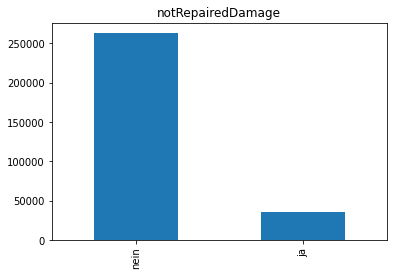

In [1105]:
# Строим картинку
df['notRepairedDamage'].value_counts().plot(kind='bar')
# Добавляем подпись
plt.title(u'notRepairedDamage')
#plt.xticks([0, 1], ['privat', 'gewerblich'], rotation=None)


Можно удалить признак, т к везде почти одно значение 

 #### проверим признаки, где мало уникальных значений

([<matplotlib.axis.XTick at 0x7f84e26234e0>,
 [Text(0, 0, 'privat'), Text(0, 0, 'gewerblich')])

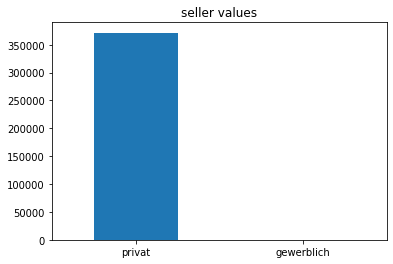

In [1106]:
# Строим картинку
df['seller'].value_counts().plot(kind='bar')
# Добавляем подпись
plt.title(u'seller values')
plt.xticks([0, 1], ['privat', 'gewerblich'], rotation=None)

Тоже можно удалить

Text(0.5, 1.0, 'offerType')

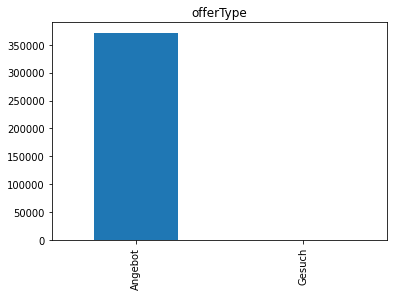

In [1107]:


# Строим картинку
df['offerType'].value_counts().plot(kind='bar')
# Добавляем подпись
plt.title(u'offerType')


Тоже можно удалить

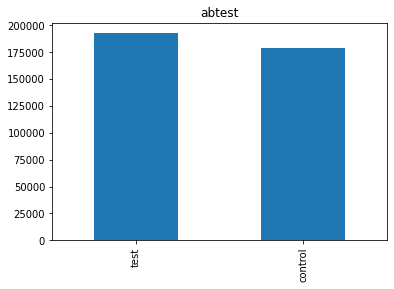

In [1108]:
# Строим картинку
col = ['abtest']
for i in col:
  df[i].value_counts().plot(kind='bar') 
  # Добавляем подпись
  plt.title(i)

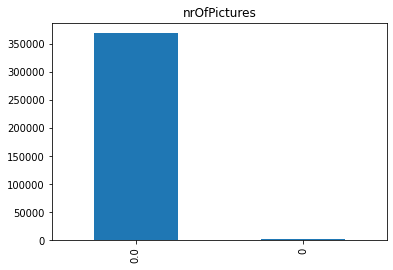

In [1109]:
# Строим картинку
col = ['nrOfPictures']
for i in col:
  df[i].value_counts().plot(kind='bar') 
  # Добавляем подпись
  plt.title(i)

Удаляем и этот

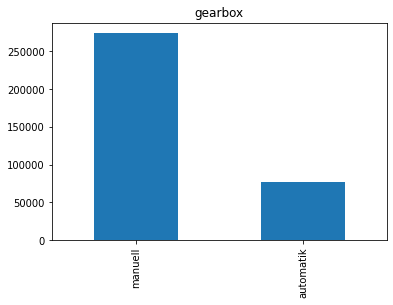

In [1110]:
# Строим картинку
col = ['gearbox']
for i in col:
  df[i].value_counts().plot(kind='bar') 
  # Добавляем подпись
  plt.title(i)

In [0]:
# Может отрезать, где одинаковое число типов gearbox?

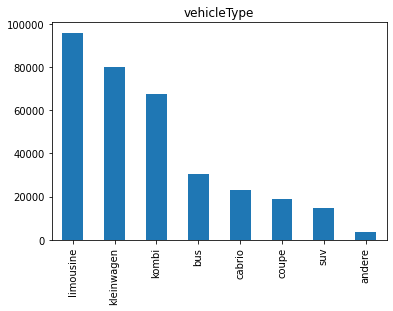

In [1112]:
# Строим картинку
col = ['vehicleType']
for i in col:
  df[i].value_counts().plot(kind='bar') 
  # Добавляем подпись
  plt.title(i)

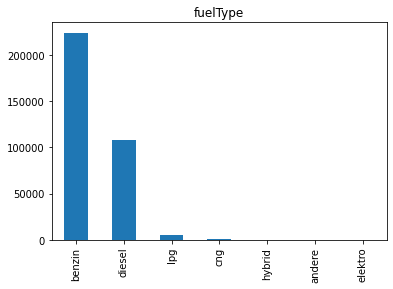

In [1113]:
# Строим картинку
col = ['fuelType']
for i in col:
  df[i].value_counts().plot(kind='bar') 
  # Добавляем подпись
  plt.title(i)

Тоже не будем брать как признак

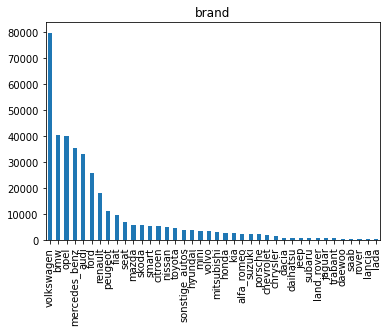

In [1114]:
# Строим картинку
col = ['brand']
for i in col:
  df[i].value_counts().plot(kind='bar') 
  # Добавляем подпись
  plt.title(i)

Не берем для модели 

In [1115]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [0]:
# Отбираем признаки для модели 
df = df[['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
         'kilometer', 'monthOfRegistration', 'fuelType']]

In [1117]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType
0,480,test,NaN,1993,manuell,0,150000,0,benzin
1,18300,test,coupe,2011,manuell,190,125000,5,diesel
2,9800,test,suv,2004,automatik,163,125000,8,diesel
3,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin
4,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel


In [1118]:
# Проверим кол-во nan
# Информация по фичам (название, кол-во пропущенных значений, число унивкальных значений, питонячий тип)
pd.DataFrame({'Feature': df.columns.tolist(),
              'NaN_count': df.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(df.columns.tolist()).apply(lambda row: df[row].nunique()),
              'type': pd.Series(df.columns.tolist()).apply(lambda row: df[row].dtype)})

,Feature,NaN_count,number_of_unique_elements,type
0,price,0,8407,object
1,abtest,0,2,object
2,vehicleType,37738,8,object
3,yearOfRegistration,0,260,object
4,gearbox,20190,2,object
5,powerPS,0,1274,object
6,kilometer,0,26,object
7,monthOfRegistration,0,26,object
8,fuelType,33349,7,object


In [1119]:
len(df)

371652

In [0]:
df_copy = df.copy()

In [0]:
# Заполним пропуски в vehicleType gearbox fuelType
def fillna_in_cat_labels(df):
  col = ['vehicleType','gearbox','fuelType']
  for i in col: 
    #df[i] = df[i].cat.add_categories(['Unknown']) - не нужно, тк в категориальные данные не переводил
    df[i] = df[i].fillna('unknown')

In [0]:
fillna_in_cat_labels(df)

In [1123]:
# Проверим кол-во nan
# Информация по фичам (название, кол-во пропущенных значений, число унивкальных значений, питонячий тип)
pd.DataFrame({'Feature': df.columns.tolist(),
              'NaN_count': df.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(df.columns.tolist()).apply(lambda row: df[row].nunique()),
              'type': pd.Series(df.columns.tolist()).apply(lambda row: df[row].dtype)})

,Feature,NaN_count,number_of_unique_elements,type
0,price,0,8407,object
1,abtest,0,2,object
2,vehicleType,0,9,object
3,yearOfRegistration,0,260,object
4,gearbox,0,3,object
5,powerPS,0,1274,object
6,kilometer,0,26,object
7,monthOfRegistration,0,26,object
8,fuelType,0,8,object


In [0]:
def type_change_into_num(df):
  col = ['price','powerPS', 'kilometer', 'monthOfRegistration', 'yearOfRegistration']
  for i in col: 
    #try:
      df[i] = df[i].astype('int')
    #except: pass

In [0]:
type_change_into_num(df)

In [1126]:
pd.DataFrame({'Feature': df.columns.tolist(),
              'NaN_count': df.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(df.columns.tolist()).apply(lambda row: df[row].nunique()),
              'type': pd.Series(df.columns.tolist()).apply(lambda row: df[row].dtype)})

,Feature,NaN_count,number_of_unique_elements,type
0,price,0,5597,int64
1,abtest,0,2,object
2,vehicleType,0,9,object
3,yearOfRegistration,0,155,int64
4,gearbox,0,3,object
5,powerPS,0,793,int64
6,kilometer,0,13,int64
7,monthOfRegistration,0,13,int64
8,fuelType,0,8,object


In [0]:
df_copy = df.copy() # check point

In [1128]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,3.716520e+05,371652.000000,371652.000000,371652.000000,371652.000000
mean,1.726256e+04,2004.575659,115.554379,125620.943786,5.735309
std,3.587309e+06,92.843849,192.108777,40107.631933,3.712298
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


Странно: цена = 0, макс и мин год регистрации, мощность 0 и 20 000 (макс в жизни 1200) 

In [1129]:
df.describe(include = 'object')

,abtest,vehicleType,gearbox,fuelType
count,371652,371652,371652,371652
unique,2,9,3,8
top,test,limousine,manuell,benzin
freq,192644,95960,274320,223960


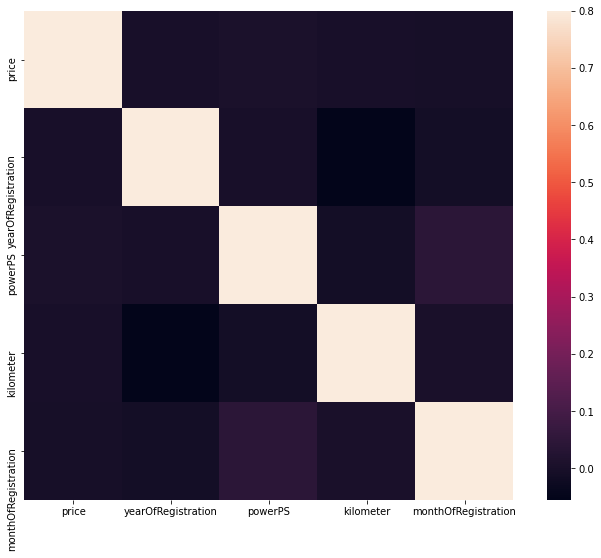

In [1130]:
# Корреляция
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# 

In [1131]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
price,1.000000,-0.000181,0.006851,-0.000642,-0.002827
yearOfRegistration,-0.000181,1.000000,0.000346,-0.055389,-0.011632
powerPS,0.006851,0.000346,1.000000,-0.010735,0.044351
kilometer,-0.000642,-0.055389,-0.010735,1.000000,0.001711
monthOfRegistration,-0.002827,-0.011632,0.044351,0.001711,1.000000


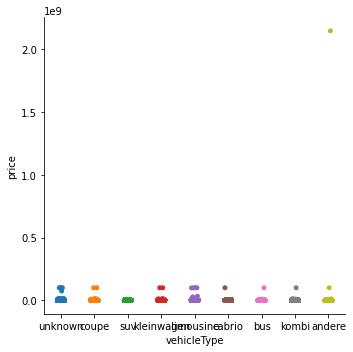

In [1132]:
g = sns.catplot(x="vehicleType", y="price", data=df)

In [0]:
# Уравнять данные по gearbox 
# Удалить выбросы 

In [0]:
# Уберем где цена = 0 
df = df[df['price'] > 0]

In [0]:
# Убираем выбросы на мощности
df = df[df['powerPS'] != 0 ]

In [0]:
# Уберем выбросы по годам 
df = df[df['yearOfRegistration'] >= 1900]

In [0]:
df = df[df['yearOfRegistration'] < 2020]

In [1138]:
df['yearOfRegistration'].unique()

array([2011, 2004, 2001, 2008, 1995, 2014, 1998, 2005, 2016, 2007, 2009,
       2002, 2018, 1997, 1990, 2017, 1981, 2003, 1991, 1984, 2006, 1999,
       2012, 1994, 2010, 2000, 1992, 2013, 1996, 1989, 2015, 1968, 1993,
       1985, 1982, 1983, 1959, 1973, 1969, 1971, 1987, 1988, 1967, 1980,
       1970, 1986, 1976, 1965, 1945, 1974, 1979, 1955, 1978, 1972, 1977,
       1961, 1964, 1975, 1966, 1937, 1963, 1936, 1958, 1956, 1933, 1941,
       1962, 1960, 1929, 1951, 1957, 1910, 1940, 1949, 1953, 1935, 2019,
       1954, 1950, 1948, 1932, 1952, 1923, 1931, 1942, 1911, 1930, 1943,
       1938, 1947, 1939, 1928, 1934, 1927, 1944])

In [0]:
df_copy = df.copy()

In [0]:
# Заменим "yearOfRegistration" на "кол-во лет с даты регистрации" 
df['yearsfromregistration'] = 2020 - df['yearOfRegistration'] 

In [0]:
df = df.drop(columns='yearOfRegistration')

In [1142]:
df.head()

,price,abtest,vehicleType,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,yearsfromregistration
1,18300,test,coupe,manuell,190,125000,5,diesel,9
2,9800,test,suv,automatik,163,125000,8,diesel,16
3,1500,test,kleinwagen,manuell,75,150000,6,benzin,19
4,3600,test,kleinwagen,manuell,69,90000,7,diesel,12
5,650,test,limousine,manuell,102,150000,10,benzin,25


In [0]:
df_copy = df.copy()

In [1144]:
df[ 'yearsfromregistration'].unique()

array([  9,  16,  19,  12,  25,   6,  22,  15,   4,  13,  11,  18,   2,
        23,  30,   3,  39,  17,  29,  36,  14,  21,   8,  26,  10,  20,
        28,   7,  24,  31,   5,  52,  27,  35,  38,  37,  61,  47,  51,
        49,  33,  32,  53,  40,  50,  34,  44,  55,  75,  46,  41,  65,
        42,  48,  43,  59,  56,  45,  54,  83,  57,  84,  62,  64,  87,
        79,  58,  60,  91,  69,  63, 110,  80,  71,  67,  85,   1,  66,
        70,  72,  88,  68,  97,  89,  78, 109,  90,  77,  82,  73,  81,
        92,  86,  93,  76])

In [1145]:
pd.DataFrame({'Feature': df.columns.tolist(),
              'NaN_count': df.isna().sum().tolist(),
              'number_of_unique_elements': pd.Series(df.columns.tolist()).apply(lambda row: df[row].nunique()),
              'type': pd.Series(df.columns.tolist()).apply(lambda row: df[row].dtype)})

,Feature,NaN_count,number_of_unique_elements,type
0,price,0,5463,int64
1,abtest,0,2,object
2,vehicleType,0,9,object
3,gearbox,0,3,object
4,powerPS,0,781,int64
5,kilometer,0,13,int64
6,monthOfRegistration,0,13,int64
7,fuelType,0,8,object
8,yearsfromregistration,0,95,int64


In [0]:
df_copy = df.copy()

In [1147]:
df['gearbox'].unique()

array(['manuell', 'automatik', 'unknown'], dtype=object)

In [1148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323889 entries, 1 to 371651
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   price                  323889 non-null  int64 
 1   abtest                 323889 non-null  object
 2   vehicleType            323889 non-null  object
 3   gearbox                323889 non-null  object
 4   powerPS                323889 non-null  int64 
 5   kilometer              323889 non-null  int64 
 6   monthOfRegistration    323889 non-null  int64 
 7   fuelType               323889 non-null  object
 8   yearsfromregistration  323889 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 24.7+ MB


In [1149]:
df.describe()

,price,powerPS,kilometer,monthOfRegistration,yearsfromregistration
count,3.238890e+05,323889.000000,323889.000000,323889.000000,323889.000000
mean,1.700613e+04,129.824746,125522.864315,5.976708,16.404027
std,3.815832e+06,196.476785,39319.936959,3.588404,7.219181
min,1.000000e+00,1.000000,5000.000000,0.000000,1.000000
25%,1.400000e+03,80.000000,100000.000000,3.000000,12.000000
50%,3.489000e+03,116.000000,150000.000000,6.000000,16.000000
75%,7.900000e+03,150.000000,150000.000000,9.000000,21.000000
max,2.147484e+09,20000.000000,150000.000000,12.000000,110.000000


In [0]:
# Не до конца убрал выбросы по мощности: убираю оч большие 
df = df[df['powerPS'] < 2000 ]

In [0]:
# 
df = df[df['powerPS'] > 15 ] 

In [1152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323449 entries, 1 to 371651
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   price                  323449 non-null  int64 
 1   abtest                 323449 non-null  object
 2   vehicleType            323449 non-null  object
 3   gearbox                323449 non-null  object
 4   powerPS                323449 non-null  int64 
 5   kilometer              323449 non-null  int64 
 6   monthOfRegistration    323449 non-null  int64 
 7   fuelType               323449 non-null  object
 8   yearsfromregistration  323449 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 24.7+ MB


In [1153]:
df.describe()

,price,powerPS,kilometer,monthOfRegistration,yearsfromregistration
count,3.234490e+05,323449.000000,323449.000000,323449.000000,323449.000000
mean,1.667983e+04,126.962071,125592.952830,5.977227,16.399003
std,3.814337e+06,69.882512,39240.178946,3.588121,7.197236
min,1.000000e+00,16.000000,5000.000000,0.000000,1.000000
25%,1.400000e+03,80.000000,100000.000000,3.000000,12.000000
50%,3.490000e+03,116.000000,150000.000000,6.000000,16.000000
75%,7.950000e+03,150.000000,150000.000000,9.000000,21.000000
max,2.147484e+09,1999.000000,150000.000000,12.000000,110.000000


In [0]:
df_copy = df.copy()

In [0]:
# убирем выбросы по цене
df = df[df['price'] >= 10]

In [0]:
df = df[df['price'] < 20000]

In [1157]:
df.describe()

,price,powerPS,kilometer,monthOfRegistration,yearsfromregistration
count,305939.000000,305939.000000,305939.000000,305939.000000,305939.000000
mean,4810.094715,121.093087,128525.261572,5.967444,16.699626
std,4568.778783,62.994652,36596.439614,3.598449,6.923346
min,10.000000,16.000000,5000.000000,0.000000,1.000000
25%,1349.000000,75.000000,125000.000000,3.000000,12.000000
50%,3100.000000,110.000000,150000.000000,6.000000,17.000000
75%,6950.000000,150.000000,150000.000000,9.000000,21.000000
max,19999.000000,1999.000000,150000.000000,12.000000,110.000000


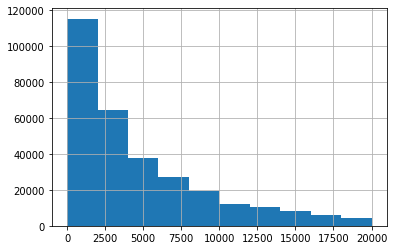

In [1158]:
df['price'].hist()

In [0]:
# Удалим признак - месяцы
df = df.drop(columns='monthOfRegistration') 

In [0]:
df_copy = df.copy()

### Возьмем за обучающую выборку часть данных, где типы gearbox представлены в одинаковом кол-ве (по 50 тыс)

In [0]:
df_model_a = df[df['gearbox'] == 'automatik'].iloc[1:70001,:]
df_model_m = df[df['gearbox'] == 'manuell'].iloc[1:70001,:]
frames = [df_model_a, df_model_m]
df_model = pd.concat(frames)

In [1194]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129992 entries, 17 to 108340
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   price                  129992 non-null  int64 
 1   abtest                 129992 non-null  object
 2   vehicleType            129992 non-null  object
 3   gearbox                129992 non-null  object
 4   powerPS                129992 non-null  int64 
 5   kilometer              129992 non-null  int64 
 6   fuelType               129992 non-null  object
 7   yearsfromregistration  129992 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.9+ MB


In [0]:
df_model = df_model.reset_index(drop=True)

In [0]:
df_model_copy = df_model.copy() # копия перед кодированием признаков


In [1197]:
df_model_copy.head()

,price,abtest,vehicleType,gearbox,powerPS,kilometer,fuelType,yearsfromregistration
0,1750,control,kleinwagen,automatik,75,150000,benzin,16
1,3699,test,limousine,automatik,231,150000,benzin,18
2,2500,control,kombi,automatik,193,150000,diesel,18
3,3300,test,limousine,automatik,113,150000,diesel,25
4,18000,test,limousine,automatik,218,20000,benzin,13


In [1198]:
df_model_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129992 entries, 0 to 129991
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   price                  129992 non-null  int64 
 1   abtest                 129992 non-null  object
 2   vehicleType            129992 non-null  object
 3   gearbox                129992 non-null  object
 4   powerPS                129992 non-null  int64 
 5   kilometer              129992 non-null  int64 
 6   fuelType               129992 non-null  object
 7   yearsfromregistration  129992 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.9+ MB


In [1199]:
df_model_copy.describe()

,price,powerPS,kilometer,yearsfromregistration
count,129992.000000,129992.000000,129992.000000,129992.000000
mean,5620.541764,136.540564,128958.897471,16.568812
std,4969.877778,69.871022,36180.509910,6.775289
min,10.000000,16.000000,5000.000000,1.000000
25%,1600.000000,90.000000,125000.000000,12.000000
50%,3900.000000,126.000000,150000.000000,16.000000
75%,8450.000000,170.000000,150000.000000,21.000000
max,19999.000000,1999.000000,150000.000000,110.000000


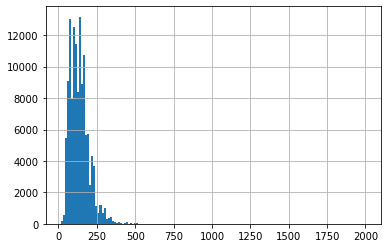

In [1200]:
df_model['powerPS'].hist(bins=150)

In [0]:
# Подправим данные по мощности 
df_model = df_model[df_model['powerPS'] < 400]

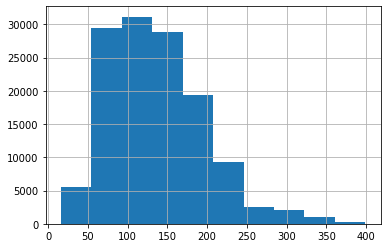

In [1202]:
df_model['powerPS'].hist()

In [1206]:
# Подправим данные по цене 
df_model[df_model['price'] > 20000 ]

,price,abtest,vehicleType,gearbox,powerPS,kilometer,fuelType,yearsfromregistration
38,18400,test,kombi,automatik,313,150000,diesel,9
51,18700,test,coupe,automatik,213,80000,benzin,11
226,19850,control,limousine,automatik,150,60000,diesel,7
322,19600,test,coupe,automatik,272,150000,benzin,11
323,18100,control,kombi,automatik,147,40000,benzin,7
...,...,...,...,...,...,...,...,...
129731,19450,test,kombi,manuell,114,60000,diesel,8
129825,18900,control,limousine,manuell,136,125000,diesel,8
129832,19350,control,bus,manuell,122,20000,benzin,7
129880,19000,control,cabrio,manuell,105,20000,benzin,6


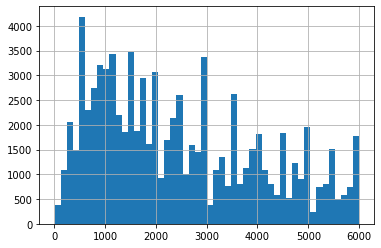

In [1172]:
df_model[df_model['price']< 6000]['price'].hist(bins = 50) #

In [0]:
# Резкие всплески возле целых цен - возможно надо было делить на группы по цене и на каждой группе обучать модель

In [0]:
#df_model = df_model[df_model['price'] < 6000 ] #  не будем ограничивать цену - модель ухудшилась  

In [0]:
#df_model_copy = df_model.copy()

### Кодирование категориальных признаков


In [0]:
# Записываем категориальные фичи
cat_features = df_model.columns[df_model.dtypes == 'object'].tolist()

In [1208]:
cat_features

['abtest', 'vehicleType', 'gearbox', 'fuelType']

In [1209]:
#  числовые признаки
numerical_feature = df_model.columns[df_model.dtypes != 'object'].tolist()
numerical_feature.remove('price')
numerical_feature

['powerPS', 'kilometer', 'yearsfromregistration']

In [0]:
# Обработка категориальных признаков с помощью One Hot Encoding
df_concat_cat_features = pd.get_dummies(df_model[cat_features])

In [0]:
# Удаление категориальных переменных
df_model.drop(cat_features, axis = 1, inplace = True)

In [0]:
# Присоединение новых
df_model = pd.concat([df_concat_cat_features, df_model], axis = 1 )

In [0]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [0]:
# Стандратизация числовых признаков
scaler=StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_model[numerical_feature]), columns = numerical_feature)

In [1184]:
df_scaled.head()

,powerPS,kilometer,yearsfromregistration
0,-0.811044,0.460544,-0.412016
1,2.378817,0.460544,-0.089018
2,1.601799,0.460544,-0.089018
3,-0.034026,0.460544,1.041473
4,0.150004,0.460544,-0.412016


In [0]:
df_model_sc = df_model.drop(columns = numerical_feature) # удаляем числовые признаки
df_model_sc = pd.concat([df_scaled, df_model], axis = 1)  # добавляем их уже в стандартизированном формате

In [1186]:
df_model_sc # плохо - еcть nan

,powerPS,kilometer,yearsfromregistration,abtest_control,abtest_test,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,vehicleType_unknown,gearbox_automatik,gearbox_manuell,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,fuelType_unknown,price,powerPS,kilometer,yearsfromregistration
0,-0.811044,0.460544,-0.412016,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1750.0,75.0,150000.0,16.0
1,2.378817,0.460544,-0.089018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3699.0,231.0,150000.0,18.0
2,1.601799,0.460544,-0.089018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2500.0,193.0,150000.0,18.0
3,-0.034026,0.460544,1.041473,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3300.0,113.0,150000.0,25.0
4,0.150004,0.460544,-0.412016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129987,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1850.0,122.0,150000.0,22.0
129988,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2399.0,75.0,150000.0,17.0
129989,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1250.0,75.0,150000.0,22.0
129990,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,555.0,102.0,150000.0,4.0


 ###  Построение модели

In [0]:
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [0]:
# Изменить датасэт: есть без и с стандартизацией 
X = df_model.drop(columns = 'price')
y = df_model['price']  
X_train, X_holdout, y_train, y_holdout = train_test_split(X.values, y, test_size=0.3,random_state=17)

In [0]:
y_train[1]

In [0]:
X_train

array([[     0,      1,      0, ...,  90000,     12,     19],
       [     0,      1,      0, ..., 150000,      7,      4],
       [     1,      0,      0, ..., 150000,      9,     18],
       ...,
       [     1,      0,      0, ..., 125000,      7,     17],
       [     0,      1,      0, ..., 150000,      3,     17],
       [     0,      1,      0, ...,  60000,      1,      8]])

#### Модели


In [0]:
def best_model_m (df, inmodel):
    X = df.drop(columns = 'price')
    y = df['price']  
    X_train, X_holdout, y_train, y_holdout = train_test_split(X.values, y, test_size=0.3,random_state=17)
    
    if inmodel == 'LinearRegression':      
      # LinearRegression
      model = LinearRegression()
      model_params = {'normalize' : [True, False]}
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1,verbose= 0)
      model_grid.fit(X_train, y_train)

    if inmodel == 'Ridge':
      # Ridge
      model = Ridge()
      model_params = {'alpha': np.arange(1,4,0.1),'normalize' : [True, False]}
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1,verbose= 0)
      model_grid.fit(X_train, y_train)
    
    if inmodel == 'Lasso':
      # Lasso
      model = Lasso()
      model_params = {'alpha': np.arange(1,4,0.1), 'normalize' : [True, False]}
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1,verbose= 0)
      model_grid.fit(X_train, y_train)              
    
    if inmodel == 'RidgeCV':
      # RidgeCV
      model = RidgeCV()
      model_params = {'normalize' : [True, False]}
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1,verbose= 0)
      model_grid.fit(X_train, y_train)

    if inmodel == 'LassoCV':
      # LassoCV
      model = LassoCV()
      model_params = {'normalize' : [True, False]}
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1,verbose= 0)
      model_grid.fit(X_train, y_train) 
    
    if inmodel == 'RFR':  
      # RFR 
      model = RandomForestRegressor()
      model_params = {'max_depth': range(1,3)#,
                      #'max_features': range(1,20)
                      } # по кол-ву признаков
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1, verbose=True)
      model_grid.fit(X_train, y_train)
    
    if inmodel == 'GRB':  
      # GRB
      model = GradientBoostingRegressor()
      model_params = {'loss': ['ls', 'lad']} 
      model_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1, verbose=True)
      model_grid.fit(X_train, y_train)
        
    result=pd.DataFrame()    
    result=pd.DataFrame({
                        "Best parameters":model_grid.best_params_,
                        "RMSE": np.sqrt(mean_squared_error(y_holdout,model_grid.predict(X_holdout))),
                        "Score model": model_grid.best_score_,
                        "Method": str(type(model)).split('.')[-1].replace("'>",'') 
                       }) 
    return result

In [1232]:
best_model_m(df_model,'LinearRegression')

,Best parameters,RMSE,Score model,Method
normalize,True,3127.195022,0.593995,LinearRegression


In [1233]:
best_model_m(df_model,'RFR')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.6s finished


,Best parameters,RMSE,Score model,Method
max_depth,2,3411.424473,0.519497,RandomForestRegressor


In [1234]:
best_model_m(df_model,'GRB')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   55.9s finished


,Best parameters,RMSE,Score model,Method
loss,ls,2259.627852,0.792138,GradientBoostingRegressor


In [1235]:
best_model_m(df_model,'Ridge')

,Best parameters,RMSE,Score model,Method
alpha,3.9,3127.186996,0.593998,Ridge
normalize,False,3127.186996,0.593998,Ridge


In [1236]:
best_model_m(df_model,'RidgeCV')

,Best parameters,RMSE,Score model,Method
normalize,False,3127.179342,0.593987,RidgeCV


In [1237]:
best_model_m(df_model,'Lasso')

,Best parameters,RMSE,Score model,Method
alpha,1,3126.97543,0.593958,Lasso
normalize,False,3126.97543,0.593958,Lasso


In [1238]:
best_model_m(df_model,'LassoCV')

,Best parameters,RMSE,Score model,Method
normalize,True,3127.132085,0.593987,LassoCV
